## Happy Customers

---

**Background:**
We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. From operational standpoint we have been facing several different challenges and everyday we are trying to address these challenges.
We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.
Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.
We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

**Data Description:**

    Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
    X1 = my order was delivered on time
    X2 = contents of my order was as I expected
    X3 = I ordered everything I wanted to order
    X4 = I paid a good price for my order
    X5 = I am satisfied with my courier
    X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

**Goal(s):**

Predict if a customer is happy or not based on the answers they give to questions asked.
Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.
Try to submit your working solution as soon as possible. The sooner the better.

**Bonus(es):**

We are very interested in finding which questions/features are more important when predicting a customer’s happiness. Using a feature selection approach show us understand what is the minimal set of attributes/features that would preserve the most information about the problem while increasing predictability of the data we have. Is there any question that we can remove in our next survey? 

----

### Let's begin with Exploratory Data Analysis

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('ACME-HappinessSurvey2020.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [9]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [10]:
print(df.duplicated().sum())

16


In [11]:
duplicates = df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())
duplicates.shape

(31, 7)

#### The number of duplicates is significant: 31 rows in the dataset are repeated instances, corresponding to 15 unique duplicated rows (=31-16).

In [13]:
df.value_counts().loc[lambda x: x > 1].reset_index()

,Y,X1,X2,X3,X4,X5,X6,count
0,1,5,1,3,3,4,4,3
1,0,4,3,5,5,5,4,2
2,1,5,4,4,4,4,5,2
3,1,5,5,5,5,5,5,2
4,1,5,3,4,3,4,5,2
5,0,4,2,4,4,4,4,2
6,1,5,1,5,5,5,5,2
7,1,5,2,4,4,5,5,2
8,1,3,3,1,3,3,4,2
9,1,4,3,2,4,3,4,2


Although the number of duplicates is significant, I chose to keep them, as the problem statement makes no mention of handling duplicates. Therefore, I consider them representative of the dataset and reflective of the original data distribution.

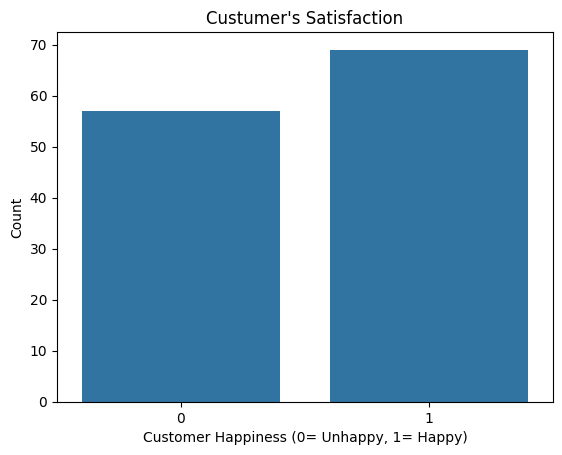

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Y', data=df)
plt.title("Custumer's Satisfaction")
plt.xlabel("Customer Happiness (0= Unhappy, 1= Happy)")
plt.ylabel("Count")
plt.show()

In [16]:
rows = df.shape[0]
print(f'Class\t\t\trows\t%\nPossitive(1 = Happy)  \t{df[df['Y']==1].shape[0]} \t{(100*df[df['Y']==1].shape[0]/rows):.1f}')
print(f'Negative(0 = Unhappy)\t{df[df['Y']==0].shape[0]} \t{(100*df[df['Y']==0].shape[0]/rows):.1f}')

Class			rows	%
Possitive(1 = Happy)  	69 	54.8
Negative(0 = Unhappy)	57 	45.2


In [17]:
features = [ 'X' + str(i) for i in range(1,7,1)]


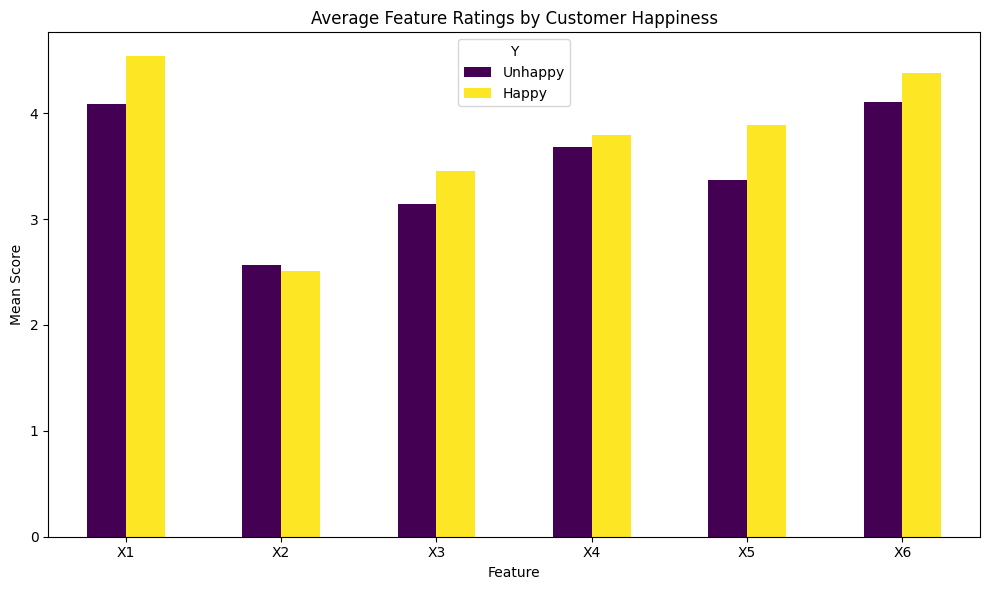

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

means = df.groupby('Y')[features].mean().T
means.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Feature Ratings by Customer Happiness')
plt.ylabel('Mean Score')
plt.xlabel('Feature')
plt.xticks(rotation=0)
plt.legend(title='Y', labels=['Unhappy', 'Happy'])
plt.tight_layout()
plt.show()

##### X1 = my order was delivered on time
##### X2 = contents of my order was as I expected
##### X3 = I ordered everything I wanted to order
##### X4 = I paid a good price for my order
##### X5 = I am satisfied with my courier
##### X6 = the app makes ordering easy for me

In [20]:
df.groupby('Y').mean()

,X1,X2,X3,X4,X5,X6
Y,,,,,,
0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
1,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812


In [21]:
df.groupby('Y').std()

,X1,X2,X3,X4,X5,X6
Y,,,,,,
0,0.851064,1.134170,1.007802,0.848484,1.189712,0.838455
1,0.698311,1.106441,1.022342,0.900649,1.064621,0.768908


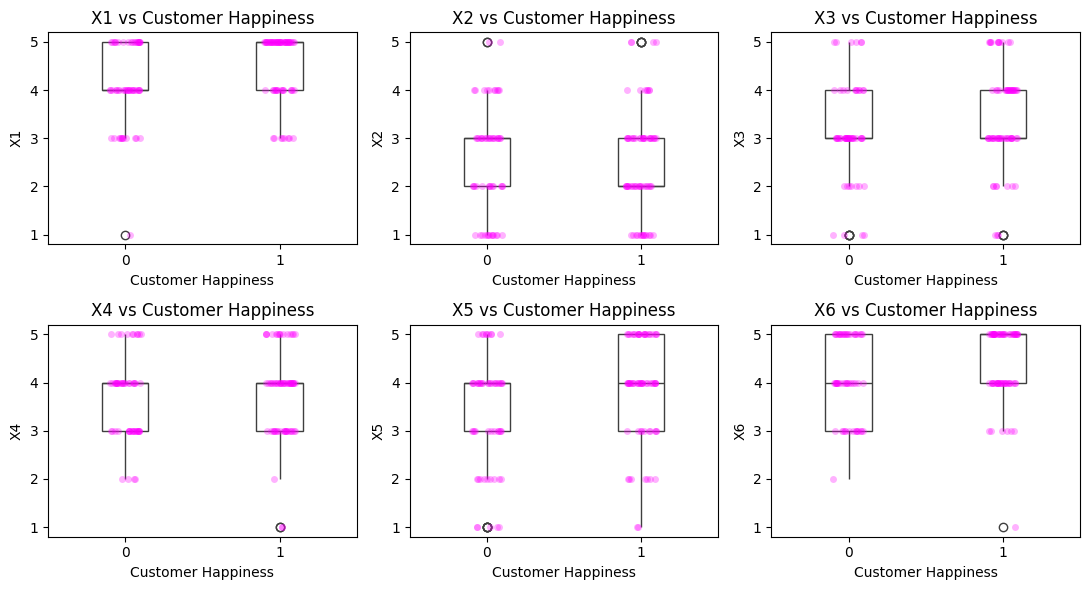

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11, 6))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.boxplot(x='Y', y=col, data=df, ax=axes[i],
                width=0.3, showcaps=False,
                boxprops={'facecolor': 'None'})
    sns.stripplot(x='Y', y=col, data=df,
                  ax=axes[i], size=5, color='magenta', alpha=.3)
    axes[i].set_title(f'{col} vs Customer Happiness')
    axes[i].set_xlabel('Customer Happiness')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

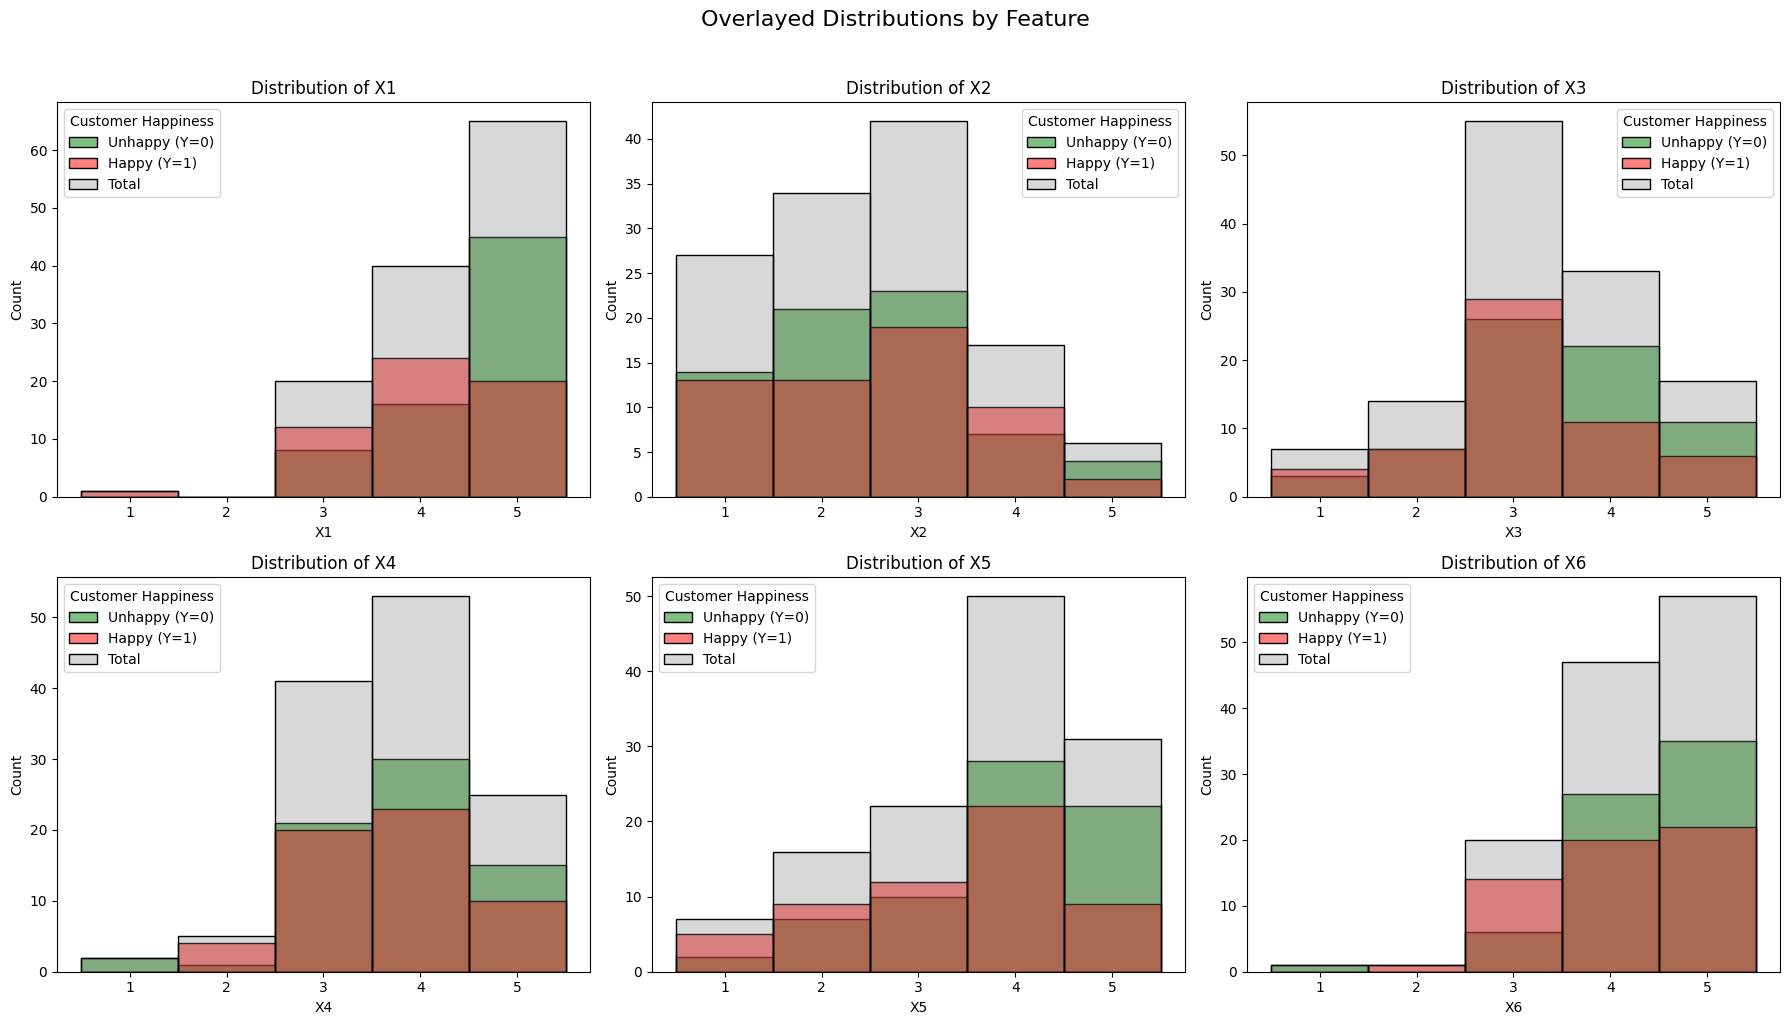

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(data=df, x=col, hue='Y', multiple='layer',
                 palette={0: 'red', 1: 'green'}, edgecolor='black',
                 stat='count', common_bins=True, bins=5, discrete=True, ax=axes[i])

    sns.histplot(data=df, x=col, color='gray', bins=5, discrete=True,
                 stat='count', edgecolor='black', label='Total', ax=axes[i], alpha=0.3)

    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend(title='Customer Happiness', labels=['Unhappy (Y=0)', 'Happy (Y=1)', 'Total'])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.suptitle("Overlayed Distributions by Feature", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


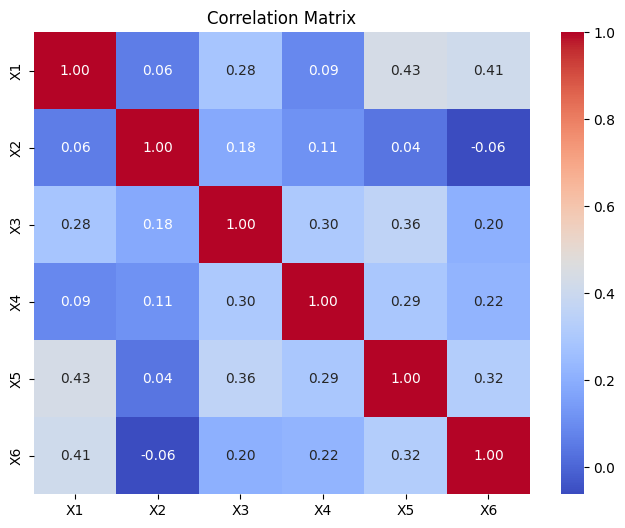

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('Y', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [25]:
from sklearn.feature_selection import mutual_info_classif

X = df[["X1", "X2", "X3", "X4", "X5", "X6"]]
y = df["Y"]

# Apply MI
mi_scores = mutual_info_classif(X, y, discrete_features=True, random_state=23)

# Wrap in a DataFrame for readability
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print(mi_df)

  Feature  MI Score
0      X1  0.049705
5      X6  0.035543
4      X5  0.027627
3      X4  0.021880
2      X3  0.017432
1      X2  0.009468


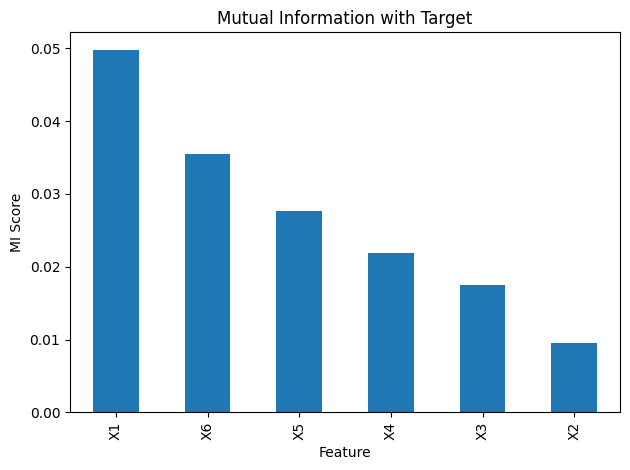

In [26]:
mi_df.plot(kind='bar', x='Feature', y='MI Score', legend=False, title='Mutual Information with Target')
plt.ylabel('MI Score')
plt.tight_layout()
plt.show()


Ranking of categorical features from most to least informative with respect to the binary target (based on Mutual Information)

In [28]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Compute Chi2 scores
chi_scores, p_values = chi2(X, y)

chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi2 Score', ascending=False)

chi2_results

,Feature,Chi2 Score,p-value
4,X5,2.273286,0.131621
0,X1,1.449041,0.228682
2,X3,0.900104,0.342754
5,X6,0.541070,0.461989
3,X4,0.106194,0.744520
1,X2,0.036161,0.849183


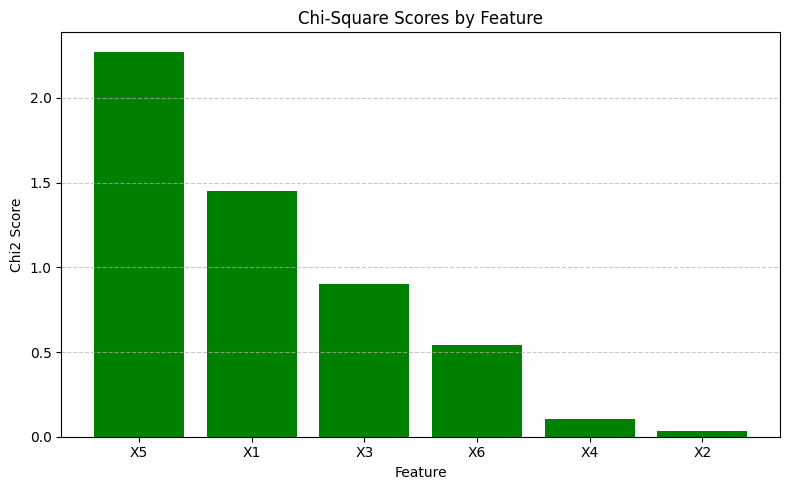

In [29]:
plt.figure(figsize=(8, 5))
plt.bar(chi2_results['Feature'], chi2_results['Chi2 Score'], color='green')
plt.title('Chi-Square Scores by Feature')
plt.xlabel('Feature')
plt.ylabel('Chi2 Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Feature Importance (Mutual Information and Chi-Square)

| Feature | MI Score | Chi² Score | Interpretation                                    |
|--------:|---------:|-----------:|--------------------------------------------------:|
| **X1**  | 0.0497   | 1.4490     | Top feature by MI, moderately associated by Chi²  |
| **X6**  | 0.0355   | 0.5411     | Second-best in MI, weak Chi² association          |
| **X5**  | 0.0276   | 2.2733     | High in both scores, borderline significant       |
| **X4**  | 0.0219   | 0.1062     | Low impact in both MI and Chi²                    |
| **X3**  | 0.0174   | 0.9001     | Mild in both, not significant                     |
| **X2**  | 0.0095   | 0.0362     | Least informative in both metrics                 |


----

# Experimenting with Prediction Models

In [33]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['Y']
# Split the sets using stratify because of the class imbalance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [34]:
print(f'Train set class balance. \nSet\tPossitive\tNegattive\nTrain \t{(100*y_train[y_train == 1].shape[0] / y_train.shape[0]):.1f} %\t\t {(100*y_train[y_train == 0].shape[0] / y_train.shape[0]):.1f}%')
print(f'Test \t{(100*y_test[y_test == 1].shape[0] / y_test.shape[0]):.1f} %\t\t {(100*y_test[y_test == 0].shape[0] / y_test.shape[0]):.1f}%')

Train set class balance. 
Set	Possitive	Negattive
Train 	55.0 %		 45.0%
Test 	53.8 %		 46.2%


#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred_LR = model_LR.predict(X_test)

In [37]:
print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_LR), 2))
print(classification_report(y_test, y_pred_LR))

Logistic Regression Accuracy: 0.38
              precision    recall  f1-score   support

           0       0.38      0.50      0.43        12
           1       0.40      0.29      0.33        14

    accuracy                           0.38        26
   macro avg       0.39      0.39      0.38        26
weighted avg       0.39      0.38      0.38        26



### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state=23)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)


In [40]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

Random Forest Accuracy: 0.538
              precision    recall  f1-score   support

           0       0.50      0.75      0.60        12
           1       0.62      0.36      0.45        14

    accuracy                           0.54        26
   macro avg       0.56      0.55      0.53        26
weighted avg       0.57      0.54      0.52        26



## General observation: 
**The target accuracy of 73% is significantly higher than the results obtained using popular classification models. To close this gap, we will experiment with feature engineering techniques.**


---

# Feature Engineering

### 1) Combine X1, X5 and X6 (strongest contributor features)

In [73]:
df['X_1_5_6'] = df[['X1', 'X5', 'X6']].mean(axis=1)

In [75]:
df['X_1_5_6_weighted'] = (0.5 * df['X1'] + 0.3 * df['X5'] + 0.2 * df['X6'])

In [77]:
features += ['X_1_5_6_weighted']
X = df[features]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [79]:
model_RF = RandomForestClassifier(random_state=23)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [81]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

Random Forest Accuracy: 0.577
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.64      0.50      0.56        14

    accuracy                           0.58        26
   macro avg       0.58      0.58      0.58        26
weighted avg       0.59      0.58      0.58        26



### 2) Add Binary Flags: Extremely Good or Bad Scores

In [84]:
for col in ['X1', 'X5', 'X6']:
    df[f'{col}_is_5'] = (df[col] == 5).astype(int)
    df[f'{col}_is_1'] = (df[col] == 1).astype(int)

In [90]:
features += ['X1_is_5', 'X1_is_1', 'X5_is_5', 'X5_is_1', 'X6_is_5', 'X6_is_1']
X = df[features]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [92]:
model_RF = RandomForestClassifier(random_state=23)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [94]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

Random Forest Accuracy: 0.615
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.70      0.50      0.58        14

    accuracy                           0.62        26
   macro avg       0.63      0.62      0.61        26
weighted avg       0.64      0.62      0.61        26



### 3) Add Binary flags for X2 and X4

In [97]:
df['X2_disappointed'] = (df['X2'] < 3).astype(int)
df['X4_bad_price'] = (df['X4'] <= 2).astype(int)

In [99]:
features += ['X2_disappointed', 'X4_bad_price']

In [101]:
X = df[features]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [103]:
model_RF = RandomForestClassifier(random_state=23)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [105]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

Random Forest Accuracy: 0.615
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        12
           1       0.70      0.50      0.58        14

    accuracy                           0.62        26
   macro avg       0.63      0.62      0.61        26
weighted avg       0.64      0.62      0.61        26



In [107]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_RF, X_test, y_test, n_repeats=30, random_state=42)


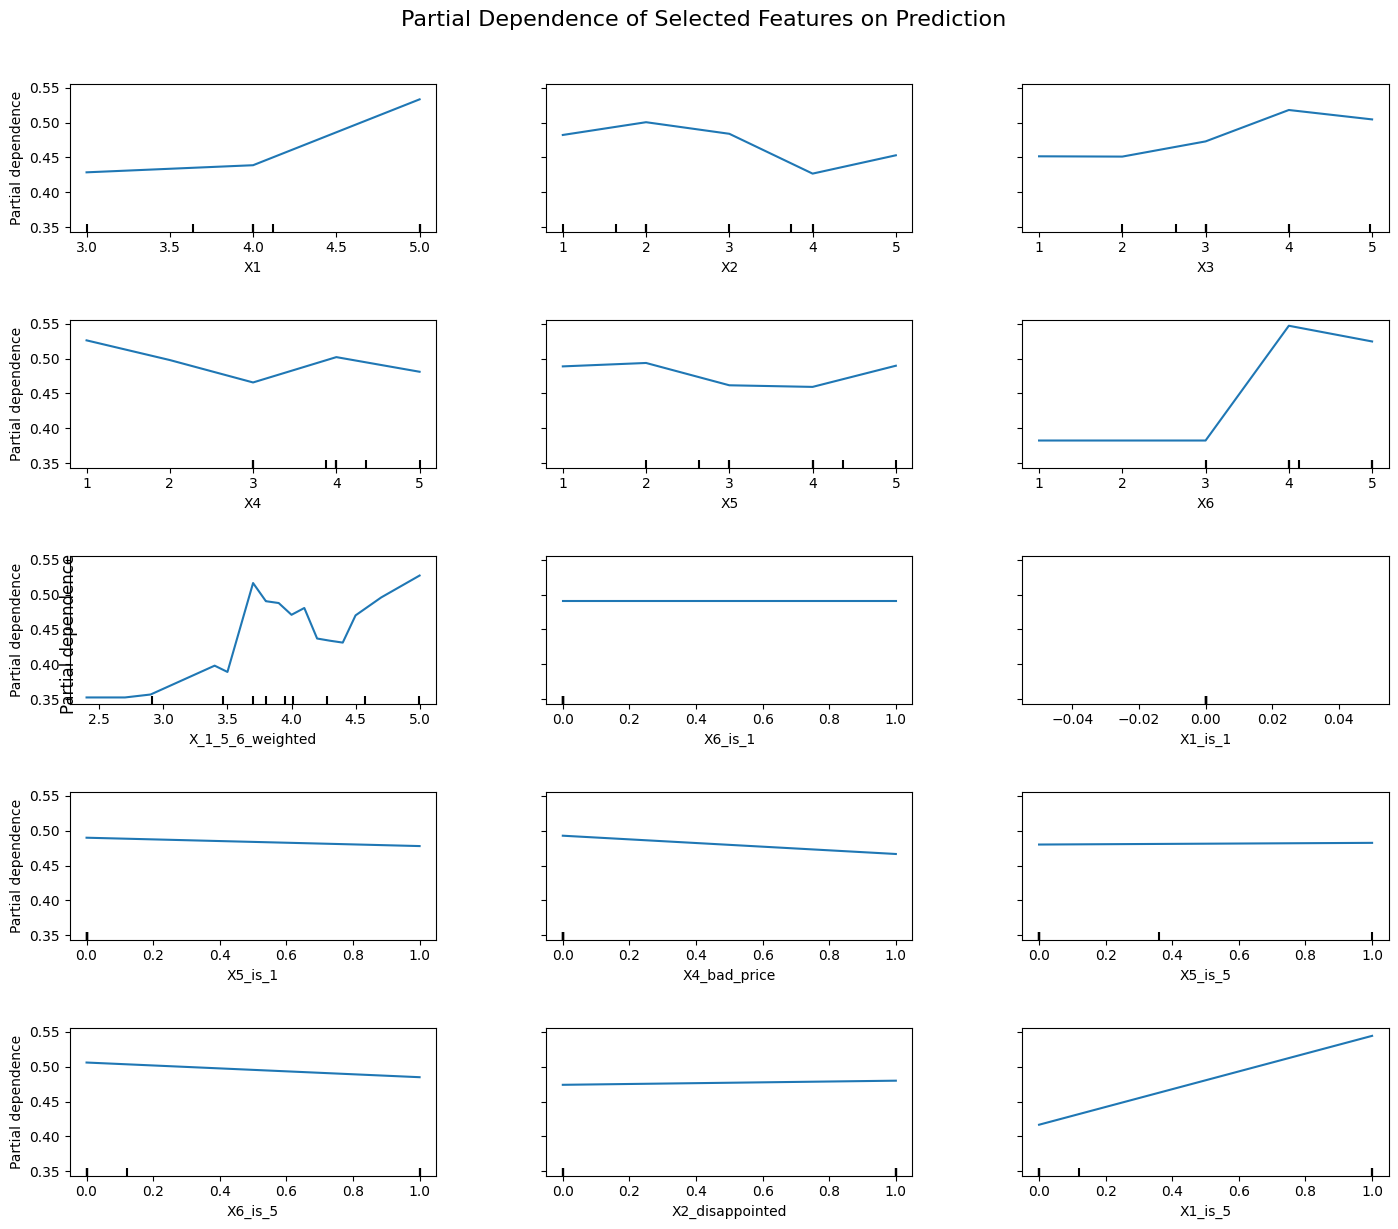

In [109]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features_to_plot = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6',
                    'X_1_5_6_weighted', 'X6_is_1', 'X1_is_1',
                    'X5_is_1', 'X4_bad_price', 'X5_is_5',
                    'X6_is_5', 'X2_disappointed', 'X1_is_5']

fig, ax = plt.subplots(figsize=(14, 12))  # increase total figure size

pdp_display = PartialDependenceDisplay.from_estimator(
    model_RF, X_test, features=features_to_plot,
    kind='average', grid_resolution=20, ax=ax
)

# Update spacing between subplots
plt.subplots_adjust(hspace=0.6, wspace=0.3)  # hspace controls row spacing

# Set one y-axis label
fig.text(0.04, 0.5, 'Partial dependence', va='center', rotation='vertical', fontsize=12)

plt.suptitle("Partial Dependence of Selected Features on Prediction", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


#### Some features show clear trends. Others are flat → meaning they contribute almost nothing to prediction.
#### Then, I will perform the following feature selection:
Keep (clear upward, steep jumps or negative slope):
* X1_is_5,
* X_1_5_6_weighted,
* X6_is_5,
* X1,
* X3,
  
Remove (flat, very noisy):
* X1_is_1,
* X5_is_1,
* X6_is_1,
* X5_is_5,
* X2_disappointed,
* X4_bad_price,
  


In [119]:
features

['X1', 'X5', 'X6', 'X_1_5_6_weighted', 'X1_is_5', 'X6_is_5']

In [117]:
# Important: I added X2, X3 and X4 to the list of features to remove because of they've shown a very low feature importance, 
# when considering Mutual Information and Chi-Square.
features_to_remove = ['X1_is_1', 'X5_is_1', 'X6_is_1', 'X5_is_5', 'X2_disappointed', 'X4_bad_price', 'X2', 'X4', 'X3']  
for feature in features_to_remove: 
    features.remove(feature)


ValueError: list.remove(x): x not in list

In [ ]:
features

In [ ]:
X = df[features]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [ ]:
model_RF = RandomForestClassifier(random_state=23)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

----

## Optimize the model and hyperparameters

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_base = DecisionTreeClassifier(max_depth=5, random_state=23)
model_ABC = AdaBoostClassifier(estimator=model_base, n_estimators=100, random_state=23)
model_ABC.fit(X_train, y_train)
y_pred_ABC = model_ABC.predict(X_test)
abc_accuracy = accuracy_score(y_test, y_pred_ABC)
print(f'AdaBoost accuracy:\t{abc_accuracy*100:.2f} %')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform
from sklearn.metrics import classification_report
import numpy as np


In [ ]:
# Define base estimator and full model
model_base = DecisionTreeClassifier(max_depth=1, random_state=23)
model_ABC = AdaBoostClassifier(estimator=model_base, random_state=23, algorithm='SAMME')

# Parameter distribution
param_dist = {
    #'estimator__n_estimators': randint(10, 100),      # RF trees
    'estimator__max_depth': randint(1, 4),            # RF depth
    'n_estimators': randint(30, 150),                      # AdaBoost estimators
    'learning_rate': uniform(0.01, 1.0)           # AdaBoost learning rate
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model_ABC,
    param_distributions=param_dist,
    n_iter=40,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=23,
    verbose=2
)




In [ ]:
# Fit search
random_search.fit(X_train, y_train)



In [ ]:
# Evaluate best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n✅ Best parameters found:")
print(random_search.best_params_)
print(f"\n🎯 Test Accuracy: {accuracy*100:.2f}%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Plotting the scores by model
plt.figure(figsize=(10, 6))

plt.plot(depths, rfc_scores, 's-', label='Random Forest')
plt.plot(depths, abc_scores, '^-', label='AdaBoost')

plt.xlabel('max Depth')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores at Different Max Depth Values')
plt.legend()
plt.grid(True)

plt.show()
     


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint

# Base estimator
rf = RandomForestClassifier(random_state=23)

# Full AdaBoost model
model = AdaBoostClassifier(base_estimator=rf, random_state=23)

param_dist = {
    'base_estimator__n_estimators': randint(10, 100),
    'base_estimator__max_depth': randint(2, 6),
    'n_estimators': randint(50, 150),
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X, y)

print("Best params:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

In [ ]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

#### Interaction Terms Between Strong Features

In [ ]:
df['X1*X5'] = df['X1'] * df['X5']
df['X5_minus_X6'] = df['X5'] - df['X6']

In [ ]:
features += ['X1*X5', 'X5_minus_X6']

In [ ]:
X = df[features]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [ ]:
model_RF = RandomForestClassifier(random_state=23)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

#### Drop Low-Correlation Features

In [ ]:
X = df.drop(columns=['Y','X2', 'X4'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=23) 

In [ ]:
model_RF = RandomForestClassifier(random_state=23)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_RF), 3))
print(classification_report(y_test, y_pred_RF))

In [ ]:
X.info()

## Feature Importance
Using Random Forest, feature importances, and correlation-based analysis, we concluded that:

Most important features:

  **X1** (On-time delivery)
  
  **X5** (Courier satisfaction)
  
  **X6** (App usability)

Least important features:

   **X2** (Contents as expected)
   
   **X4** (Price satisfaction)
   
**These could be considered for removal in future surveys without significant loss in predictive power.**

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    model_RF.estimators_[0],               # One tree from the forest
    feature_names=X.columns,         # Show feature names
    class_names=['Unhappy', 'Happy'],
    filled=True, rounded=True, fontsize=10
)
plt.title("Decision Tree from Random Forest")
plt.show()


In [ ]:
score_progression = [.538, .577, .615, .962]
feature_eng = ['No Feature Eng', 'Weigthed sum(X1, X5, X6)', 'Binary Flags', 'Drop Low Correlation feat. (X2, X4)']
plt.figure(figsize=(14,7))
plt.plot(feature_eng, score_progression, marker='o', linestyle='-', color='steelblue')
# Add point labels
for i, score in enumerate(score_progression):
    plt.text(i, score + 0.01, f"{score:.3f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Accuracy Progression with Feature Engineering")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### We visualized how accuracy improved step by step as feature engineering evolved. Notably, the final boost came when we dropped the low-correlation features X2 and X4, leading to a dramatic leap in accuracy, effectively unlocking the model’s full predictive potential. This highlights the importance of eliminating weak or noisy signals when working with compact, structured data.